<a href="https://colab.research.google.com/github/Akhilanandateja/Data_analysis_using_Python/blob/main/DAUP_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]
P(X ≥ 4) = 0.1295


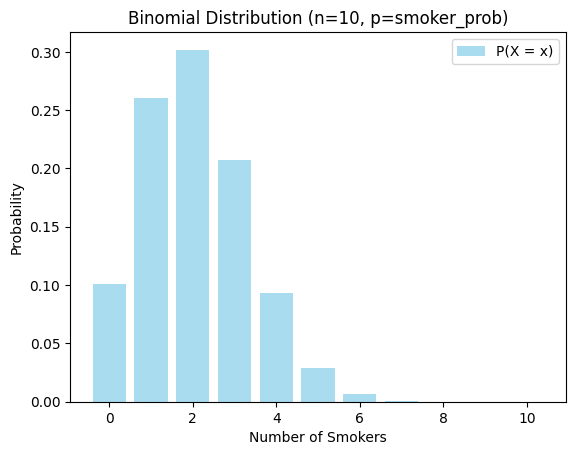

P(X = 5) = 0.1084
P(X ≤ 5) = 0.9336


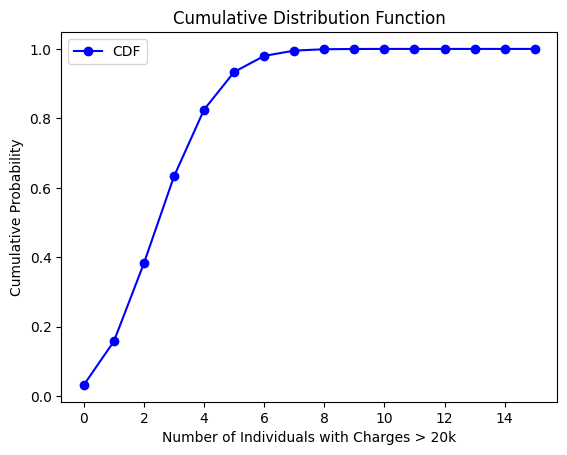

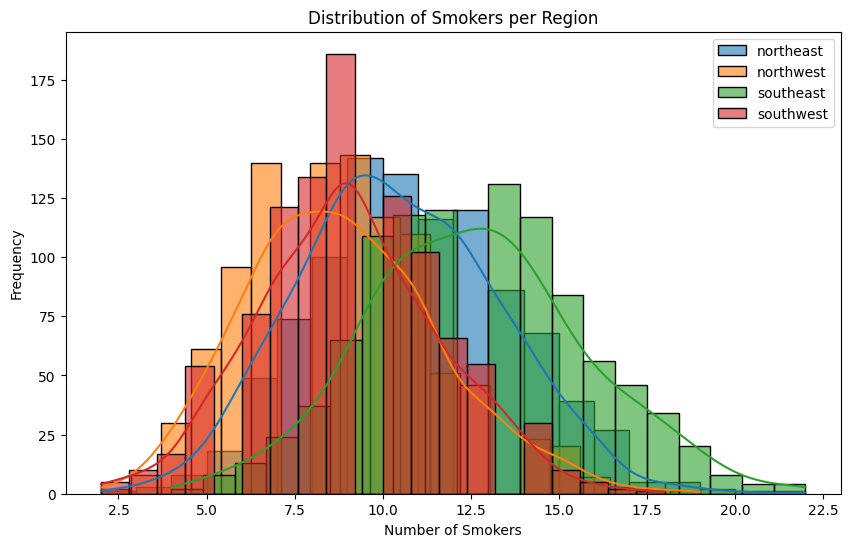

High-risk charge threshold: $34831.72
P(X = 8) = 0.0058


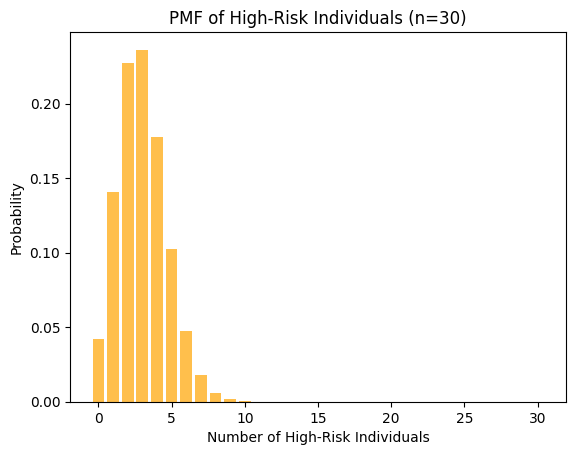

P(X ≥ 5) = 0.0000


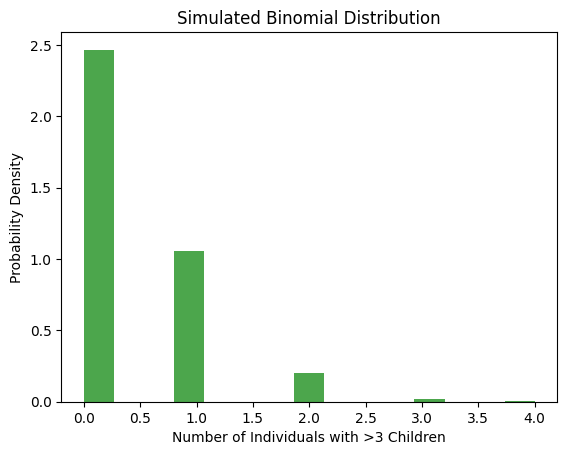

Simulated Mean: 0.41, Theoretical Mean: 0.39
Simulated Variance: 0.40, Theoretical Variance: 0.37


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

# Load dataset
df = pd.read_csv("insurance.csv")
print(df)

# Compute probabilities dynamically
p_smoker = df['smoker'].value_counts(normalize=True).get('yes', 0)
p_high_charges = (df['expenses'] > 20000).mean()
p_more_than_3_children = (df['children'] > 3).mean()
region_probs = df.groupby('region')['smoker'].apply(lambda x: (x == 'yes').mean()).to_dict()

# Question 1(a): Probability that at least 4 out of 10 are smokers
n, p = 10, p_smoker
prob_4_or_more = 1 - binom.cdf(3, n, p)
print(f"P(X ≥ 4) = {prob_4_or_more:.4f}")

# Question 1(b): Plot Binomial Distribution
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)
plt.bar(x, y, color='skyblue', alpha=0.7, label='P(X = x)')
plt.xlabel('Number of Smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n=10, p=smoker_prob)')
plt.legend()
plt.show()

# Question 2(a): Probability that exactly 5 out of 15 have charges > 20k
n, p = 15, p_high_charges
prob_5 = binom.pmf(5, n, p)
print(f"P(X = 5) = {prob_5:.4f}")

# Question 2(b): Cumulative probability P(X ≤ 5)
prob_at_most_5 = binom.cdf(5, n, p)
print(f"P(X ≤ 5) = {prob_at_most_5:.4f}")

# Question 2(c): Plot CDF
x = np.arange(0, n+1)
cdf_y = binom.cdf(x, n, p)
plt.plot(x, cdf_y, marker='o', linestyle='-', color='blue', label='CDF')
plt.xlabel('Number of Individuals with Charges > 20k')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')
plt.legend()
plt.show()

# Question 3: Simulating smoking rates across regions
n_samples = 1000
n_individuals = 50
simulated_data = {region: np.random.binomial(n_individuals, prob, n_samples) for region, prob in region_probs.items()}

# Visualization of simulated data
plt.figure(figsize=(10, 6))
for region, data in simulated_data.items():
    sns.histplot(data, kde=True, label=region, bins=20, alpha=0.6)
plt.xlabel('Number of Smokers')
plt.ylabel('Frequency')
plt.title('Distribution of Smokers per Region')
plt.legend()
plt.show()

# Question 4(a): High-risk insurance charge threshold (Top 10%)
charge_threshold = df['expenses'].quantile(0.9)
print(f"High-risk charge threshold: ${charge_threshold:.2f}")

# Question 4(b): Probability of selecting 8 high-risk individuals in 30 policyholders
n, p = 30, (df['expenses'] > charge_threshold).mean()
prob_8 = binom.pmf(8, n, p)
print(f"P(X = 8) = {prob_8:.4f}")

# Question 4(c): Plot PMF
x = np.arange(0, n+1)
plt.bar(x, binom.pmf(x, n, p), color='orange', alpha=0.7)
plt.xlabel('Number of High-Risk Individuals')
plt.ylabel('Probability')
plt.title('PMF of High-Risk Individuals (n=30)')
plt.show()

# Question 5(a): Probability that at least 5 have >3 children
n, p = 12, p_more_than_3_children
prob_5_or_more = 1 - binom.cdf(4, n, p)
print(f"P(X ≥ 5) = {prob_5_or_more:.4f}")

# Question 5(b): Simulate 1000 samples for n=12
samples = np.random.binomial(n, p, 1000)
plt.hist(samples, bins=15, alpha=0.7, color='green', density=True)
plt.xlabel('Number of Individuals with >3 Children')
plt.ylabel('Probability Density')
plt.title('Simulated Binomial Distribution')
plt.show()

# Question 5(c): Compare Mean and Variance
simulated_mean = np.mean(samples)
simulated_variance = np.var(samples)
theoretical_mean = n * p
theoretical_variance = n * p * (1 - p)
print(f"Simulated Mean: {simulated_mean:.2f}, Theoretical Mean: {theoretical_mean:.2f}")
print(f"Simulated Variance: {simulated_variance:.2f}, Theoretical Variance: {theoretical_variance:.2f}")
